# End-to-End Machine Learning Project
### Downloading and quick Look at the Data Structure

In [110]:
import pandas as pd
import numpy as np

data = pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [113]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


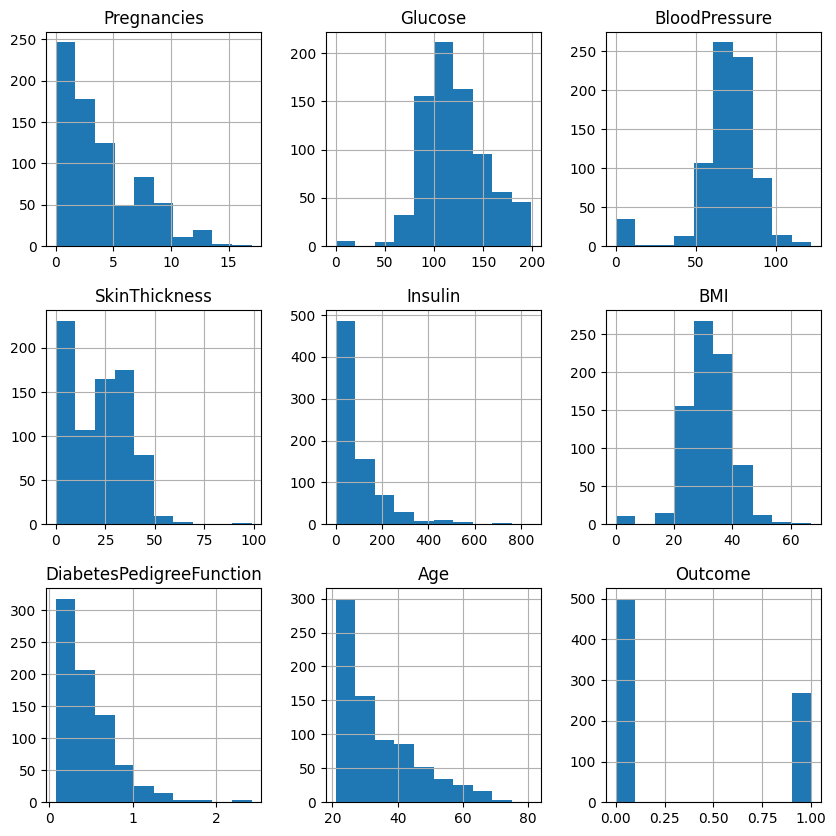

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(10,10))
plt.show()

### Create a Test Set

In [115]:
np.random.seed(13)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [116]:
train_set, test_set = split_train_test(data, 0.3)
len(train_set)

538

In [117]:
len(test_set)

230

In [118]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [119]:
data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.3, "index")
len(train_set)

538

In [120]:
len(test_set)

230

In [121]:
train_set, test_set

(     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0        0            6      148             72             35        0  33.6   
 1        1            1       85             66             29        0  26.6   
 3        3            1       89             66             23       94  28.1   
 4        4            0      137             40             35      168  43.1   
 6        6            3       78             50             32       88  31.0   
 ..     ...          ...      ...            ...            ...      ...   ...   
 762    762            9       89             62              0        0  22.5   
 763    763           10      101             76             48      180  32.9   
 764    764            2      122             70             27        0  36.8   
 765    765            5      121             72             23      112  26.2   
 767    767            1       93             70             31        0  30.4   
 
      Diabetes

In [122]:
data = data.reset_index()
data_with_id["id"] = data["Glucose"] * 1000 + data["BloodPressure"]
train_set, test_set = split_train_test_by_id(data_with_id, 0.3, "id")
train_set, test_set

(     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0        0            6      148             72             35        0  33.6   
 1        1            1       85             66             29        0  26.6   
 3        3            1       89             66             23       94  28.1   
 4        4            0      137             40             35      168  43.1   
 5        5            5      116             74              0        0  25.6   
 ..     ...          ...      ...            ...            ...      ...   ...   
 757    757            0      123             72              0        0  36.3   
 762    762            9       89             62              0        0  22.5   
 765    765            5      121             72             23      112  26.2   
 766    766            1      126             60              0        0  30.1   
 767    767            1       93             70             31        0  30.4   
 
      Diabetes

In [123]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=13)
train_set, test_set

(     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 246    246           10      122             68              0        0  31.2   
 208    208            1       96             64             27       87  33.2   
 548    548            1      164             82             43       67  32.8   
 542    542           10       90             85             32        0  34.9   
 147    147            2      106             64             35      119  30.5   
 ..     ...          ...      ...            ...            ...      ...   ...   
 742    742            1      109             58             18      116  28.5   
 528    528            0      117             66             31      188  30.8   
 74      74            1       79             75             30        0  32.0   
 176    176            6       85             78              0        0  31.2   
 338    338            9      152             78             34      171  34.2   
 
      Diabetes

<AxesSubplot:>

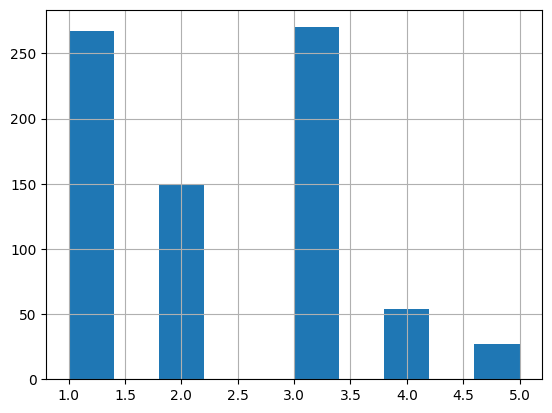

In [124]:
data["age_cat"] = pd.cut(data["Age"],bins=[1, 25, 30, 50, 60, np.inf],labels=[1, 2, 3, 4, 5])
data["age_cat"].hist()

In [125]:
data["age_cat"].value_counts()

3    270
1    267
2    150
4     54
5     27
Name: age_cat, dtype: int64

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit #83

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=13)
for train_index, test_index in split.split(data, data["age_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
strat_test_set["age_cat"].value_counts() / len(strat_test_set)

1    0.350649
3    0.350649
2    0.194805
4    0.069264
5    0.034632
Name: age_cat, dtype: float64

### Visualizing Dependence of insulin levels on age

In [127]:
data = strat_train_set.copy()

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

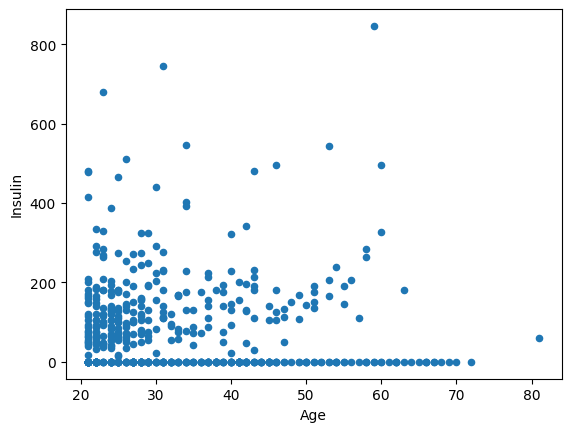

In [128]:
data.plot(kind="scatter", x="Age", y="Insulin")

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

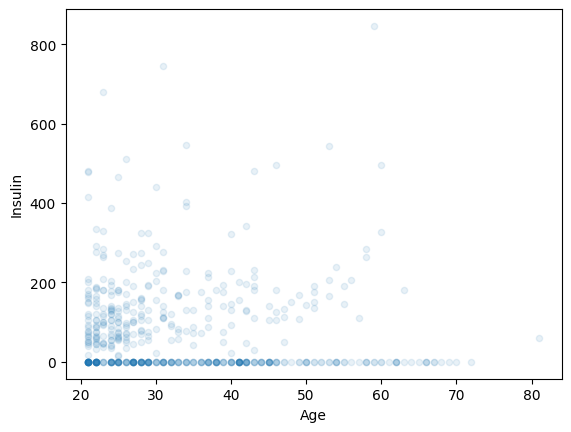

In [129]:
data.plot(kind="scatter", x="Age", y="Insulin", alpha=0.1)

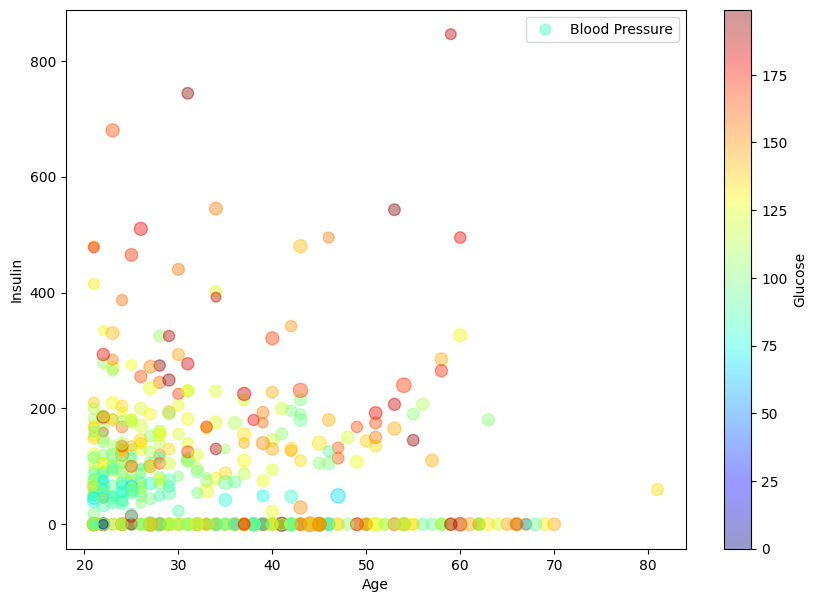

In [130]:
data.plot(kind="scatter", x="Age", y="Insulin", alpha=0.4, 
          s=data["BloodPressure"], label="Blood Pressure", figsize=(10,7), 
          c="Glucose", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

### Correlations

In [131]:
corr_matrix = data.corr()

In [132]:
corr_matrix["Glucose"].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.461785
Insulin                     0.361195
Age                         0.242011
BMI                         0.231052
DiabetesPedigreeFunction    0.155465
BloodPressure               0.150488
Pregnancies                 0.111778
SkinThickness               0.084432
index                       0.015212
Name: Glucose, dtype: float64

array([[<AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Age', ylabel='Glucose'>],
       [<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='BloodPressure'>,
        <AxesSubplot:xlabel='Insulin', ylabel='BloodPressure'>,
        <AxesSubplot:xlabel='Age', ylabel='BloodPressure'>],
       [<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Insulin'>,
        <AxesSubplot:xlabel='Age', ylabel='Insulin'>],
       [<AxesSubplot:xlabel='Glucose', ylabel='Age'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Age'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

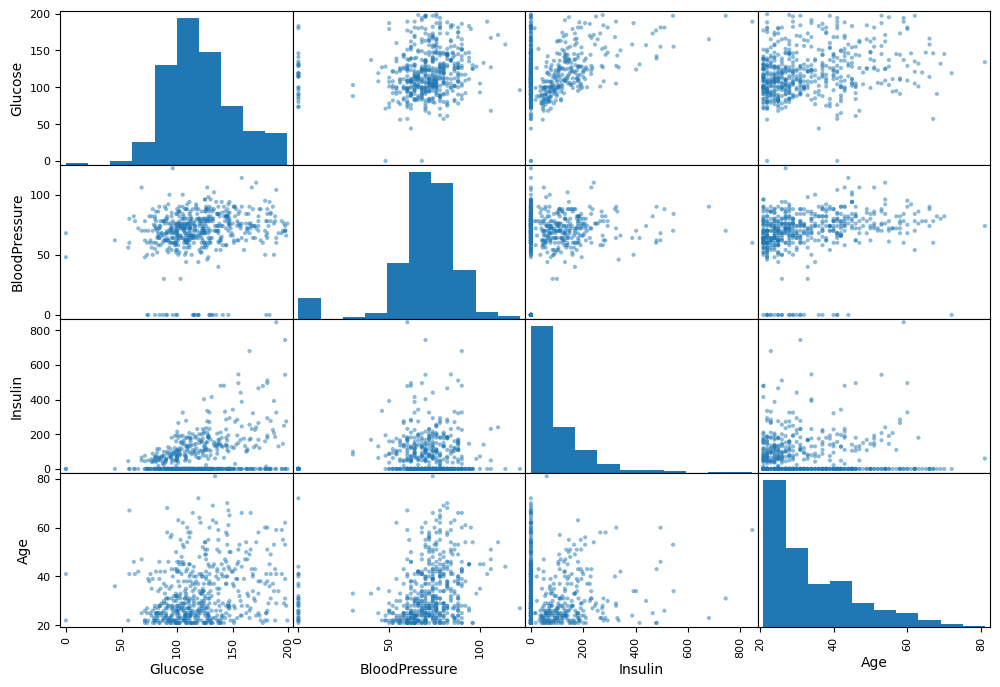

In [133]:
from pandas.plotting import scatter_matrix

attributes = ["Glucose", "BloodPressure", "Insulin", "Age"]
scatter_matrix(data[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

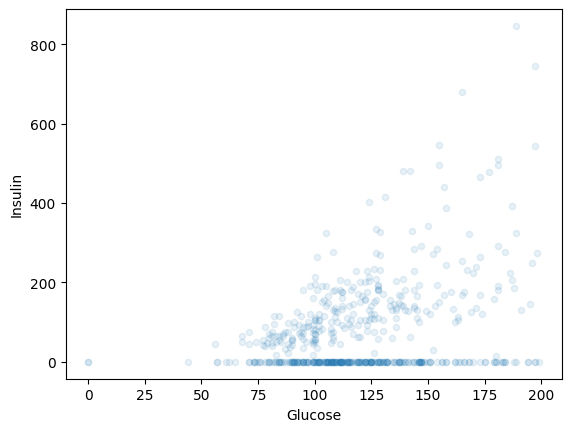

In [134]:
data.plot(kind="scatter", x="Glucose", y="Insulin", alpha=0.1)

### Attribute Combinations

In [135]:
data["GlucosePerInsulin"] = data["Glucose"] / data["Insulin"]
data["BloodPressurePerAge"] = data["BloodPressure"] / data["Age"]

corr_matrix = data.corr()
corr_matrix["Glucose"].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.461785
Insulin                     0.361195
Age                         0.242011
BMI                         0.231052
DiabetesPedigreeFunction    0.155465
BloodPressure               0.150488
Pregnancies                 0.111778
SkinThickness               0.084432
index                       0.015212
BloodPressurePerAge        -0.071217
GlucosePerInsulin          -0.114172
Name: Glucose, dtype: float64

### Data Cleaning

In [136]:
data = strat_train_set.drop("Glucose", axis=1)
data_labels = strat_train_set["Glucose"].copy()

In [137]:
median = data["BloodPressure"].median()
data["BloodPressure"].fillna(median, inplace=True)

In [138]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [139]:
data_num = data.drop("Insulin", axis=1)
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [140]:
imputer.statistics_

array([390.   ,   3.   ,  72.   ,  23.   ,  32.4  ,   0.391,  29.   ,
         0.   ,   2.   ])

In [141]:
data_num.median(numeric_only=True).values

array([390.   ,   3.   ,  72.   ,  23.   ,  32.4  ,   0.391,  29.   ,
         0.   ])

In [142]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)
data_tr.head()

,index,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,age_cat
372,372.0,0.0,64.0,22.0,35.8,0.545,21.0,0.0,1.0
244,244.0,2.0,76.0,35.0,38.2,0.329,29.0,0.0,2.0
418,418.0,1.0,68.0,0.0,18.2,0.624,27.0,0.0,2.0
83,83.0,0.0,65.0,28.0,24.6,0.237,22.0,0.0,1.0
101,101.0,1.0,60.0,0.0,26.1,0.179,22.0,0.0,1.0


### Custom Transformers

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin

insulin_ix, age_ix, glucose_ix, blood_pressure_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_insulin_per_age = True):
        self.add_insulin_per_age = add_insulin_per_age
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        insulin_per_blood_pressure = X[:, insulin_ix] / (X[:, blood_pressure_ix] + 1)
        age_per_glucose = X[:, age_ix] / (X[:, glucose_ix] + 1)
        if self.add_insulin_per_age:
            insulin_per_age = X[:, insulin_ix] / (X[:, age_ix] + 1)
            return np.c_[X, insulin_per_blood_pressure, age_per_glucose, insulin_per_age]
        else:
            return np.c_[X, insulin_per_blood_pressure, age_per_glucose]

attr_adder = CombinedAttributesAdder(add_insulin_per_age=False)
data_extra_attribs = attr_adder.transform(data.values)
data_extra_attribs

array([[372.        ,   0.        ,  64.        , ...,   1.        ,
         14.2394822 ,   1.79347826],
       [244.        ,   2.        ,  76.        , ...,   2.        ,
         26.33559067,   4.94897959],
       [418.        ,   1.        ,  68.        , ...,   2.        ,
          0.        ,   0.        ],
       ...,
       [327.        ,  10.        ,  70.        , ...,   3.        ,
          0.        ,   0.        ],
       [133.        ,   8.        ,  74.        , ...,   3.        ,
         21.27659574,   0.        ],
       [286.        ,   5.        ,  84.        , ...,   3.        ,
         27.17726992,  13.7279597 ]])

### Transformation Pipelines

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())])
data_num_tr = num_pipeline.fit_transform(data_num)
data_num_tr

array([[-0.06972685, -1.13019282, -0.2583148 , ...,  0.55957185,
         0.11279171, -0.04468697],
       [-0.63988449, -0.53779307,  0.35819652, ...,  0.85574368,
         0.99909178,  0.23257019],
       [ 0.13517355, -0.83399295, -0.05281103, ..., -1.21745909,
        -1.79037541, -0.60649753],
       ...,
       [-0.2701729 ,  1.83180593,  0.04994086, ..., -1.21745909,
         1.07967214, -0.60649753],
       [-1.13431807,  1.23940618,  0.25544464, ...,  0.15973989,
         0.60834169,  0.13478571],
       [-0.45280152,  0.35080656,  0.76920407, ...,  1.01652267,
         0.22924775,  0.43504548]])

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(data_num)
cat_attribs = ["Age"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs)])
data_prepared = full_pipeline.fit_transform(data)
data_prepared

<537x64 sparse matrix of type '<class 'numpy.float64'>'
	with 6981 stored elements in Compressed Sparse Row format>

### Training and Evaluating on the Training Set

In [149]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [150]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [111.07485519 116.14565558 100.77429876 100.53974945 103.66365549]
Labels: [84, 146, 83, 101, 151]


In [151]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

24.9891703946705

In [152]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels)

data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross-Validation

In [153]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([35.50221694, 35.90445139, 39.92840815, 41.86309256, 39.03725666,
       40.99367612, 39.60756568, 46.85102846, 41.84269734, 40.04973323])

In [154]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [35.50221694 35.90445139 39.92840815 41.86309256 39.03725666 40.99367612
 39.60756568 46.85102846 41.84269734 40.04973323]
Mean: 40.15801265316962
Standard deviation: 3.0435669816004394


In [155]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [28.71490504 23.80424959 26.18398968 27.56497146 27.2122465  27.70528856
 28.08167174 46.42341199 27.86862532 30.78606607]
Mean: 29.43454259382445
Standard deviation: 5.907106254305091


In [156]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_labels)

data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.958703674237173

In [157]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [27.72371575 24.16597137 27.58740903 25.93338243 30.39598533 27.18487212
 27.54303384 38.30397356 27.46355808 31.88367084]
Mean: 28.818557234192536
Standard deviation: 3.7506456250675213


### Grid Search

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [159]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [160]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [161]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32.705989758543 {'max_features': 2, 'n_estimators': 3}
29.318444048032948 {'max_features': 2, 'n_estimators': 10}
29.054262980474377 {'max_features': 2, 'n_estimators': 30}
32.725026486820944 {'max_features': 4, 'n_estimators': 3}
29.24867577539286 {'max_features': 4, 'n_estimators': 10}
28.74162912467884 {'max_features': 4, 'n_estimators': 30}
33.14131151568469 {'max_features': 6, 'n_estimators': 3}
29.37793895065781 {'max_features': 6, 'n_estimators': 10}
28.424630040490115 {'max_features': 6, 'n_estimators': 30}
32.476987796843076 {'max_features': 8, 'n_estimators': 3}
29.149334348717936 {'max_features': 8, 'n_estimators': 10}
28.745411966213705 {'max_features': 8, 'n_estimators': 30}
33.53164247792542 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
29.703283605354436 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
33.5354200668722 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
29.546353594485335 {'bootstrap': False, 'max_features': 3, 'n_estimator

### Evaluate System on the Test Set

In [162]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("Glucose", axis=1)
y_test = strat_test_set["Glucose"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

30.746454672170064